In [1]:
#단양하수처리장 수질 예측 knn 
!pip uninstall --y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle -v


Uninstalling kaggle-1.5.8:
  Successfully uninstalled kaggle-1.5.8
     |████████████████████████████████| 1.5MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=5af459cf49f87e05e0dba396b0fc5fb46ca3fdc43af55fb3bed6b15700f76dee
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [4]:
!kaggle competitions download -c 2020ai-project-18011797
!unzip 2020ai-project-18011797.zip

  0% 0.00/7.45k [00:00<?, ?B/s]
100% 7.45k/7.45k [00:00<00:00, 5.87MB/s]
Archive:  2020ai-project-18011797.zip
  inflating: waterquality_submit.csv  
  inflating: waterquality_test.csv   
  inflating: waterquality_train.csv  


In [31]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('waterquality_train.csv',header=None,skiprows=1)
df_test = pd.read_csv('waterquality_test.csv',header=None,skiprows=1)
print(df_train.head(20))
print(df_test.head(20))


    outflow  temp  (pH(-))  BOD  COD   SS     T-N    T-P  Escherichia coli
0      1538  11.2      7.1  1.3  4.4  0.4   6.400  0.030                21
1      1498  11.1      7.0  1.7  6.4  2.6   3.931  0.030                26
2      1905  11.3      7.1  0.7  6.9  2.0   4.241  0.027                16
3      1492  14.2      7.1  0.7  7.3  2.0   4.912  0.033                17
4      1540  12.0      7.2  1.0  7.5  2.2   4.166  0.030                23
5      1548  14.3      7.3  1.3  8.0  3.3   3.193  0.078                21
6      1904  12.1      7.1  1.7  7.7  2.6   3.265  0.038                17
7      1508  12.2      7.1  0.7  9.0  2.7   3.941  0.033                 6
8      1504  12.1      7.1  1.4  5.9  1.5   7.756  0.097                16
9      1527  12.2      7.1  1.6  4.3  1.1   8.388  0.047                13
10     1502  12.1      7.2  0.9  8.0  3.0   4.055  0.036                19
11     1858  12.2      7.1  1.5  6.5  2.8   4.559  0.008                13
12     1483  12.1      7.

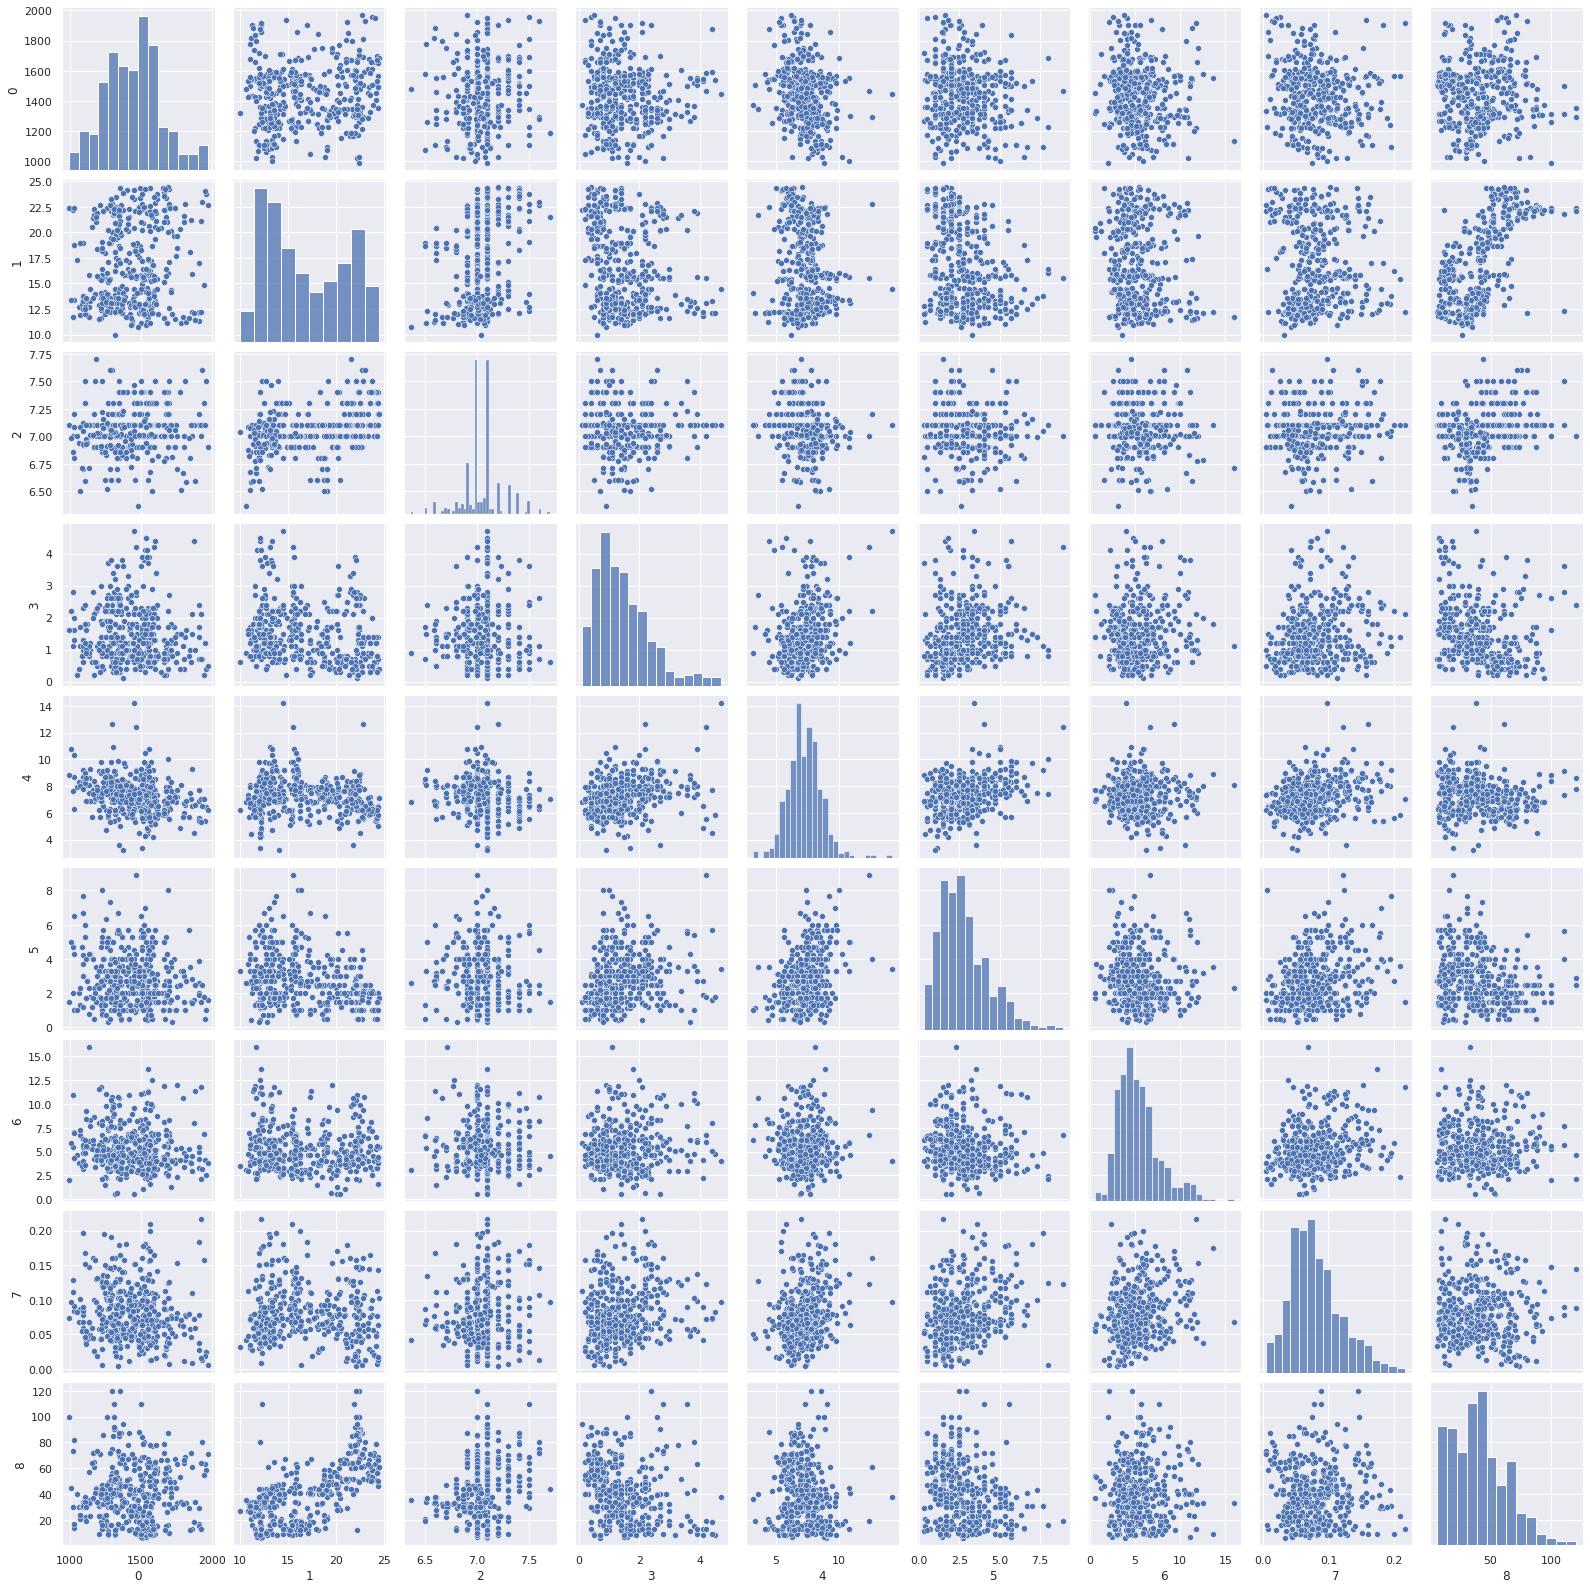

In [9]:
sns.set()
sns.pairplot(df_train)

In [73]:
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,[-1]]
test_x = df_test.iloc[:,1:]
X.drop('(pH(-))',axis=1)
test_x.drop('(pH(-))',axis=1)
print(X.shape)
print(y.shape)
print(test_x.shape)


(406, 7)
(406, 1)
(50, 7)


In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.5,random_state=1,shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(203, 7)
(203, 7)
(203, 1)
(203, 1)


In [75]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_std=scale.fit_transform(X_train)
x_test_std=scale.transform(X_test)

In [76]:
from sklearn.neighbors import KNeighborsRegressor

neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance',p=2)
    knn.fit(x_train_std,y_train)
    train_accuracy[i] = knn.score(x_train_std,y_train)
    test_accuracy[i] = knn.score(x_test_std,y_test)


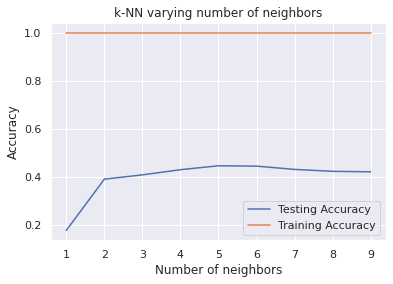

In [77]:
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [78]:
knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(x_train_std,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [79]:
y_train_pred = knn.predict(x_train_std)
y_test_pred = knn.predict(x_test_std)

print('Miss training sample : %d' %(y_train!=y_train_pred).sum())
print('Miss test samples  : %d' %(y_test!=y_test_pred).sum())

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test_pred,y_test) **0.5)


Miss training sample : 0
Miss test samples  : 203
17.420215335173133


In [80]:
test_std = scale.transform(test_x)

y_pred = knn.predict(test_std)
y_pred

array([[29.64257988],
       [25.47521414],
       [25.3750192 ],
       [17.33912991],
       [20.72427364],
       [10.93277738],
       [14.02539911],
       [17.39068705],
       [18.40360279],
       [32.31429002],
       [29.21171699],
       [11.04767023],
       [11.42414364],
       [19.91914691],
       [20.36722882],
       [28.05769871],
       [59.12134162],
       [65.22378366],
       [61.48057605],
       [64.02227937],
       [64.52763856],
       [74.56318008],
       [52.65878479],
       [39.55349079],
       [45.4680323 ],
       [42.45958565],
       [45.51900841],
       [41.88510523],
       [32.62935398],
       [39.16566265],
       [29.63180496],
       [40.9337372 ],
       [62.46470512],
       [30.19387442],
       [29.72730382],
       [35.89017002],
       [32.33133001],
       [29.51047693],
       [31.98337837],
       [27.83182421],
       [32.49045413],
       [28.12480561],
       [33.27324917],
       [25.13531926],
       [33.65343659],
       [33

In [81]:
submit = pd.read_csv('waterquality_submit.csv')
submit

,Id,Expected
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [82]:
for i in range(len(y_pred)):
  submit['Expected'][i] = y_pred[i].item()

submit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,Expected
0,0,29.642580
1,1,25.475214
2,2,25.375019
3,3,17.339130
4,4,20.724274
5,5,10.932777
6,6,14.025399
7,7,17.390687
8,8,18.403603
9,9,32.314290


In [83]:
submit.to_csv('result.csv',mode='w',index=False)
!kaggle competitions submit -c 2020ai-project-18011797 -f result.csv -m "14010974 이기택 LATE"

100% 1.05k/1.05k [00:07<00:00, 150B/s]
Successfully submitted to SejongAI.텀프로젝트.[단양하수처리장 수질 예측]